## Preprocessing

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Deep Learning!
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Import pandas and read the charity_data.csv from the provided cloud URL.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [19]:
# Determine the number of unique values in each column.
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is string-based
        print(col)
        print(df[col].nunique())

NAME
19568
APPLICATION_TYPE
17
AFFILIATION
6
CLASSIFICATION
71
USE_CASE
5
ORGANIZATION
4
INCOME_AMT
9
SPECIAL_CONSIDERATIONS
2


<Axes: xlabel='NAME'>

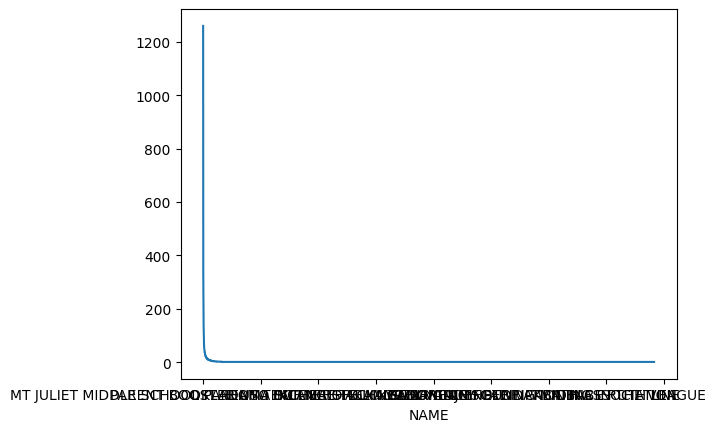

In [20]:
df.NAME.value_counts().plot()

In [21]:
# df.NAME.value_counts().head(50)

In [22]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=["EIN", "NAME"])

In [23]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df.APPLICATION_TYPE.value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [24]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500

temp = df.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [25]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df.CLASSIFICATION.value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C1248,1
C6100,1
C1820,1


<Axes: xlabel='CLASSIFICATION'>

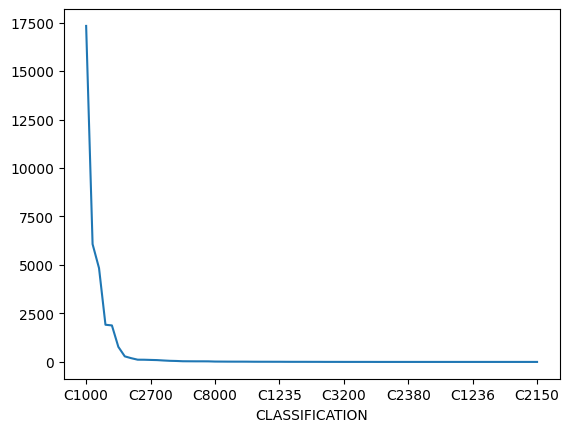

In [26]:
df.CLASSIFICATION.value_counts().plot()

In [27]:
# You may find it helpful to look at CLASSIFICATION value counts >1
temp = df.CLASSIFICATION.value_counts()
temp.loc[temp > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [28]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 100

temp = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
pd.get_dummies(df, dtype=int)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [30]:
# Label (Ordinal Encode) SPECIAL_CONSIDERATIONS
df["SPECIAL_CONSIDERATIONS"] = df["SPECIAL_CONSIDERATIONS"].map({"N": 0, "Y": 1})

In [31]:
# One Hot Encode
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


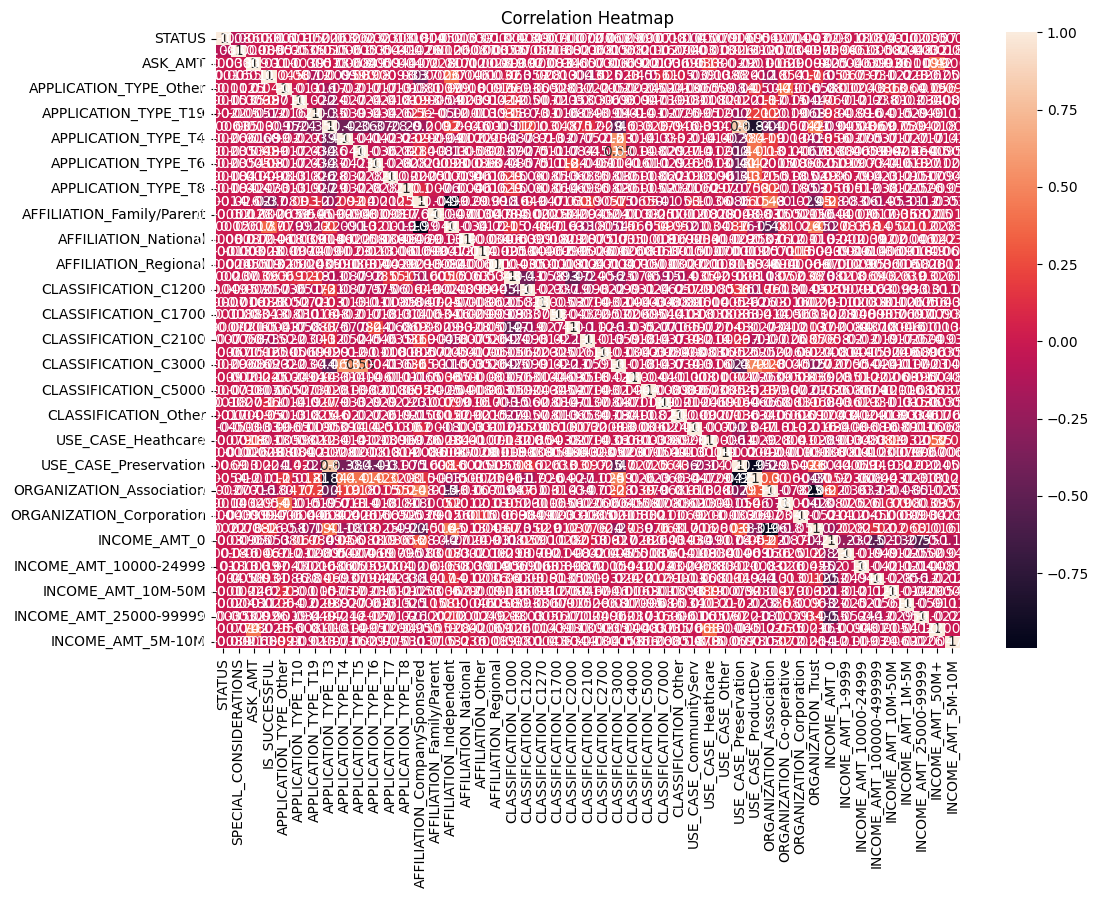

In [32]:
corrs = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
abs(corrs.IS_SUCCESSFUL).sort_values(ascending=False)

,IS_SUCCESSFUL
IS_SUCCESSFUL,1.000000
AFFILIATION_CompanySponsored,0.369379
AFFILIATION_Independent,0.368322
ORGANIZATION_Association,0.179561
ORGANIZATION_Trust,0.162164
CLASSIFICATION_C2100,0.147895
APPLICATION_TYPE_T19,0.123303
CLASSIFICATION_C7000,0.110084
APPLICATION_TYPE_T4,0.098692
APPLICATION_TYPE_T5,0.088575


In [34]:
df.IS_SUCCESSFUL.value_counts()

,count
IS_SUCCESSFUL,
1,18261
0,16038


In [35]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.drop(['IS_SUCCESSFUL'], axis=1)
y = df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(34299, 48)
(25724, 48)
(8575, 48)


In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0108,-0.029257,-0.032437,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,0.995423,-0.408517,-0.052236,-0.090506,-0.467020,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,-0.12552,-0.329838,-0.082045,-0.170539,2.866491,-0.063405,-0.074504
1,0.0108,-0.029257,-0.032533,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,-1.004598,-0.408517,-0.052236,-0.090506,2.141235,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,7.96688,-0.329838,-0.082045,-0.170539,-0.348859,-0.063405,-0.074504
2,0.0108,-0.029257,-0.032411,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,-1.004598,-0.408517,-0.052236,-0.090506,2.141235,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,-0.12552,3.031791,-0.082045,-0.170539,-0.348859,-0.063405,-0.074504
3,0.0108,-0.029257,-0.032533,-0.089408,-0.126316,5.581666,-1.939799,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,1.086703,-0.041393,-1.079753,-0.03119,-0.012471,-0.018708,0.995423,-0.408517,-0.052236,-0.090506,-0.467020,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,-2.142369,2.265405,1.539084,-0.121464,-0.03638,-1.482535,0.634943,-0.145459,-0.12552,-0.329838,-0.082045,-0.170539,-0.348859,-0.063405,-0.074504
4,0.0108,-0.029257,-0.032533,-0.089408,-0.126316,-0.179158,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,0.995423,-0.408517,-0.052236,-0.090506,-0.467020,-0.240452,-0.055854,-0.243154,-0.07607,-0.061523,-0.150128,-0.141508,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,0.634943,-0.145459,-0.12552,-0.329838,-0.082045,-0.170539,-0.348859,-0.063405,-0.074504


## Compile, Train and Evaluate the Model

In [38]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

In [40]:
 # Create the Keras Sequential model
nn_model1 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

nn_model1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model1.summary()

# Compile the model
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model1 = nn_model1.fit(X_train, y_train, epochs=10) # lol

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 5)                   │             245 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5118 - loss: 44264.7734
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4706 - loss: 0.6963
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5320 - loss: 0.6918
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5311 - loss: 0.6913
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5340 - loss: 0.6909
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5318 - loss: 0.6912
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5344 - loss: 0.6908
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5351 - loss: 0.6907
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5317 - loss: 0.6912
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5323 - loss: 0.6911
268/268 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6831
Loss: 0.6830927729606628, Accuracy: 0.5323615074157715


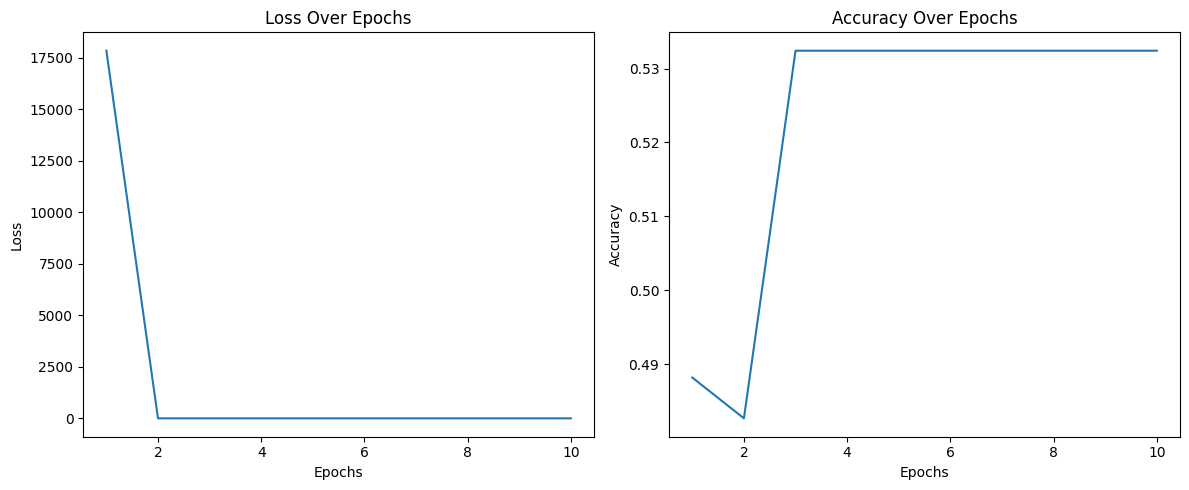

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the loss
history_df.plot(y="loss", ax=axes[0], title="Loss Over Epochs", legend=False)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot the accuracy
history_df.plot(y="accuracy", ax=axes[1], title="Accuracy Over Epochs", legend=False)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.35      8575
wei

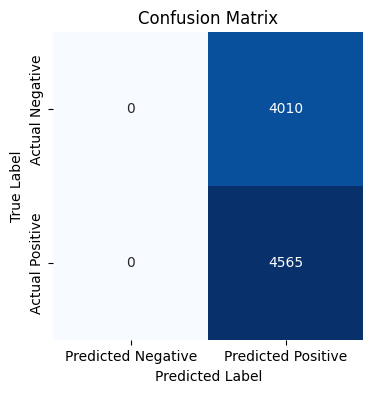

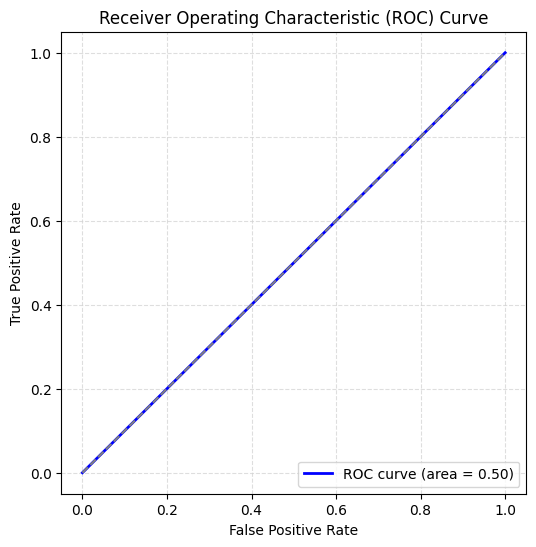

In [42]:
 doClassification_NN(nn_model1, X_train, X_test, y_train, y_test)

In [ ]:
# REPEAT TWICE MORE